In [110]:
import numpy as np
import matplotlib.pyplot as plt
font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 28}
font1 = {'family': 'serif', 'size': 24}

In this file you can see the Reinforcement learning test codes.

In [111]:
# def sample_gaussian_distribution(d):
#     v = np.random.normal(0,1, size=d) 
#     return v

# def euclidean_projection(point, lower_bounds, upper_bounds):
#     def objective_function(z):
#         return np.linalg.norm(z - point) ** 2

#     constraints = []
#     for i in range(len(lower_bounds)):
#         constraints.append({'type': 'ineq', 'fun': lambda z, i=i: z[i] - lower_bounds[i]})
#         constraints.append({'type': 'ineq', 'fun': lambda z, i=i: upper_bounds[i] - z[i]})

#     result = minimize(objective_function, point, constraints=constraints, method='COBYLA')
#     return result.x

def grad(func,x,mu=0.05):
    u = np.random.normal(0,1, size=len(x))
    g = (func(x+mu*u)-func(x))/mu
    return g*u


def step(func,x,h,mu=0.05):
    grd = grad(func,x,mu)
    xx = x - h*grd
    return xx

def RM(func,x0,T,h = 0.001,mu=0.05,flag2 = 'not_c',lower_bounds=[],upper_bounds=[]):
    dim1 = len(x0)
    x=np.zeros((dim1,T+1))
    x[:,0]=x0.ravel()
    if flag2 == 'not_c':
        for k in range(T):
          x[:,k+1] = step(func,x[:,k],h,mu)
    # if flag2 == 'c':
    #     for k in range(T):
    #       x[:,k+1] =euclidean_projection(step(func,x[:,k],h,mu),lower_bounds,upper_bounds)
    return x



We will try tau = 0.5 first and then tau=5.

In [112]:
K = 20
MC =10
reward = np.random.rand(K).reshape(-1,1)
eta = 0.1
tau = 5e-1

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def policy(theta):
    return softmax(theta)

def loss_function(theta):
    return np.mean(reward-tau*np.log(policy(theta)))

def H(pi):
    return np.diag(pi)-pi@pi.T

def compute_gradient(pit):
    return H(pit)@(reward-tau*np.log(policy(pit)))


def update_parameters(theta, gradient):
    return theta + eta * gradient


pi_theta_ast = softmax(reward / tau)

def calculate_delta(pit):
    return pi_theta_ast.T@(reward-tau*np.log(pi_theta_ast)) - pit.T@(reward-tau*np.log(pit))


iterations = 2500
delta_values = np.zeros((iterations,MC))
delta_values1 = np.zeros((iterations,MC))
for i in range(MC):
    theta = np.random.normal(size=K).reshape(-1,1)
    delta_values[0,i] = calculate_delta(policy(theta))
    delta_values1[0,i] = calculate_delta(policy(theta))

    tt = RM(lambda *x: loss_function(*x),theta,iterations,h = 0.1,mu=0.00001)
    for t in range(iterations-1):
        piti = policy(tt[:,t])
        delta = calculate_delta(piti.reshape(-1,1))
        delta_values[t+1,i] = delta


    for t in range(iterations-1):
        pi_theta = policy(theta)

        gradient = compute_gradient(pi_theta)
        
        theta = update_parameters(theta, gradient)

        delta = calculate_delta(pi_theta)
        delta_values1[t+1,i] = delta




In [113]:
K = 20
MC =10 
reward = np.random.rand(K).reshape(-1,1)
eta = 0.1
tau = 5e0

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def policy(theta):
    return softmax(theta)

def loss_function(theta):
    return np.mean(reward-tau*np.log(policy(theta)))

def H(pi):
    return np.diag(pi)-pi@pi.T

def compute_gradient(pit):
    return H(pit)@(reward-tau*np.log(policy(pit)))


def update_parameters(theta, gradient):
    return theta + eta * gradient


pi_theta_ast = softmax(reward / tau)

def calculate_delta(pit):
    return pi_theta_ast.T@(reward-tau*np.log(pi_theta_ast)) - pit.T@(reward-tau*np.log(pit))


iterations2 = 400
delta_values3 = np.zeros((iterations2,MC))
delta_values4 = np.zeros((iterations2,MC))
for i in range(MC):
    theta = np.random.normal(size=K).reshape(-1,1)
    delta_values3[0,i] = calculate_delta(policy(theta))
    delta_values4[0,i] = calculate_delta(policy(theta))

    tt = RM(lambda *x: loss_function(*x),theta,iterations,h = 0.1,mu=0.00001)
    for t in range(iterations2-1):
        piti = policy(tt[:,t])
        delta = calculate_delta(piti.reshape(-1,1))
        delta_values3[t+1,i] = delta


    for t in range(iterations2-1):
        pi_theta = policy(theta)

        gradient = compute_gradient(pi_theta)
        
        theta = update_parameters(theta, gradient)

        delta = calculate_delta(pi_theta)
        delta_values4[t+1,i] = delta



In [114]:
delta_values_a = np.mean(delta_values,axis=1)
delta_values1_a = np.mean(delta_values1,axis=1)
delta_values3_a = np.mean(delta_values3,axis=1)
delta_values4_a = np.mean(delta_values4,axis=1)
delta_values_se = np.std(delta_values, axis=1)
delta_values1_se = np.std(delta_values1, axis=1)
delta_values3_se = np.std(delta_values3, axis=1)
delta_values4_se = np.std(delta_values4, axis=1)

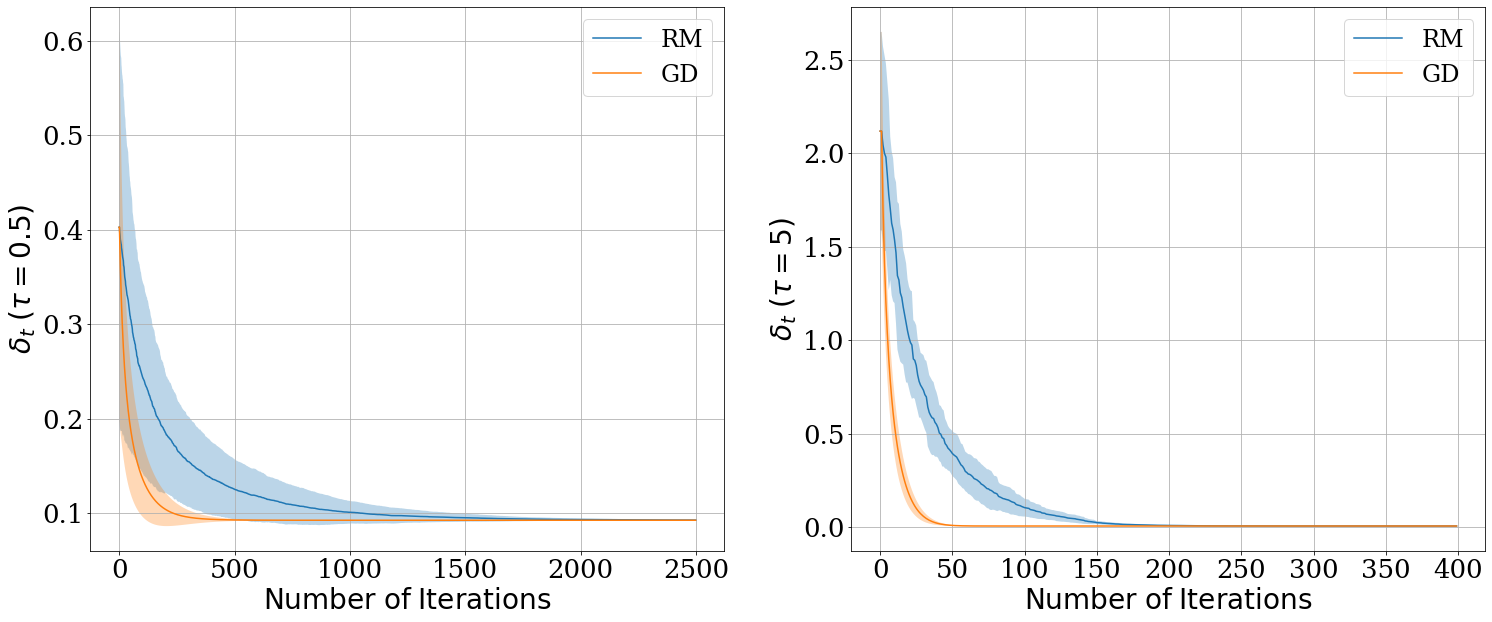

In [115]:
t = np.array(range(iterations))
t2 = np.array(range(iterations2))
plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.xticks(fontname='serif', fontsize=26, color='black')
plt.yticks(fontname='serif', fontsize=26, color='black')
plt.plot(t,delta_values_a,label='RM')
plt.plot(t,delta_values1_a,label='GD')
plt.fill_between(t, delta_values_a - delta_values_se, delta_values_a + delta_values_se, alpha=0.3)
plt.fill_between(t, delta_values1_a - delta_values1_se, delta_values1_a + delta_values1_se, alpha=0.3)
plt.xlabel(r'$\mathrm{Number\; of\; Iterations}$', fontsize=28)
plt.ylabel(r'$\delta_t\;(\tau=0.5)}$', fontdict=font)
plt.legend(loc='best', prop=font1)
plt.grid('on')
plt.subplot(1, 2, 2)
plt.xticks(fontname='serif', fontsize=26, color='black')
plt.yticks(fontname='serif', fontsize=26, color='black')
plt.plot(t2,delta_values3_a,label='RM')
plt.plot(t2,delta_values4_a,label='GD')
plt.fill_between(t2, delta_values3_a - delta_values3_se, delta_values3_a + delta_values3_se, alpha=0.3)
plt.fill_between(t2, delta_values4_a - delta_values4_se, delta_values4_a + delta_values4_se, alpha=0.3)
plt.xlabel(r'$\mathrm{Number\; of\; Iterations}$', fontsize=28)
plt.ylabel(r'$\delta_t\;(\tau=5)}$', fontdict=font)
plt.legend(loc='best', prop=font1)
plt.grid('on')
plt.savefig('Pics/Bandit.pdf', format='pdf')

In [116]:
print(delta_values_a[-1],delta_values1_a[-1])
print(delta_values3_a[-1],delta_values4_a[-1])

0.09269368288568983 0.09251317511451307
0.005317133226594706 0.0053196883406869235
